## Using TensorFlow in Machine Learning: simple example
One of the most common uses of TensorFlow is building and training machine learning models. Let’s create a simple neural network model using TensorFlow's high-level API, Keras.

We'll build a simple model to predict y value for a given x value. I created CSV file where

children: denotes number of children

banana : denotes how many banana are eaten

- This actually follows a simple relationship: banana = 1 + 2*children .  ( That is  y = 1 + 2x )


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data collection**

Here we collect data

In [3]:
# Load data from CSV
df = pd.read_csv("child_banana.csv")  # Replace with your actual CSV file path
# df = pd.read_csv("/content/sample_data/child_banana.csv")  # Replace with your actual CSV file path

print(df)

   children  banana
0         1       3
1         2       5
2         3       7
3         4       9


In [4]:
print(df.shape)

(4, 2)


**Data cleaning and feature extraction done**

**EDA:**
Lets try our visualize our data

In [11]:
# Assuming the CSV file has columns 'children' and 'banana'
X = df[['children']].values.astype(np.float32)  # Extract 'x' column as NumPy array
y = df[['banana']].values.astype(np.float32)  # Extract 'y' column as NumPy array

# x = np.array([[1], [2], [3], [4]], dtype=np.float32)
# y = np.array([[3], [5], [7], [9]], dtype=np.float32)  # y = 2x + 1

print(f"shape of X: {X.shape}")
print(f"shape of y: {y.shape}")
print("########################")
print(f"X:\n{X}")
print(f"y:\n{y}")

shape of X: (4, 1)
shape of y: (4, 1)
########################
X:
[[1.]
 [2.]
 [3.]
 [4.]]
y:
[[3.]
 [5.]
 [7.]
 [9.]]


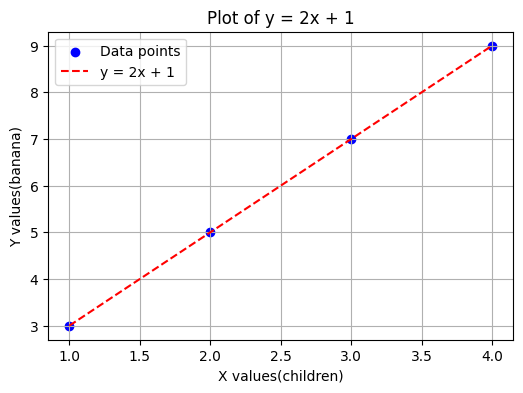

In [6]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot for points
plt.plot(X, 2*X + 1, color='red', linestyle='--', label='y = 2x + 1')  # Line

# Labels and Title
plt.xlabel('X values(children)')
plt.ylabel('Y values(banana)')
plt.title('Plot of y = 2x + 1')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

**Build model**
 This is neural network with single neuron as input.


In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Dense(units=1, input_shape=(1,))  # Single neuron, single input
])
# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 9.1139 - val_loss: 18.1114
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 7.2109 - val_loss: 14.0160
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 5.7067 - val_loss: 10.8157
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 4.5177 - val_loss: 8.3188
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 3.5778 - val_loss: 6.3741
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 2.8348 - val_loss: 4.8627
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 2.2475 - val_loss: 3.6908
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 1.7833 - val_loss: 2.7847
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 1.4162 - val_loss: 2.0863
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.1261 - val_loss: 1.5502
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.8967 - val_loss: 1.1405
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.7154 - val_loss: 0.8291
Epoch

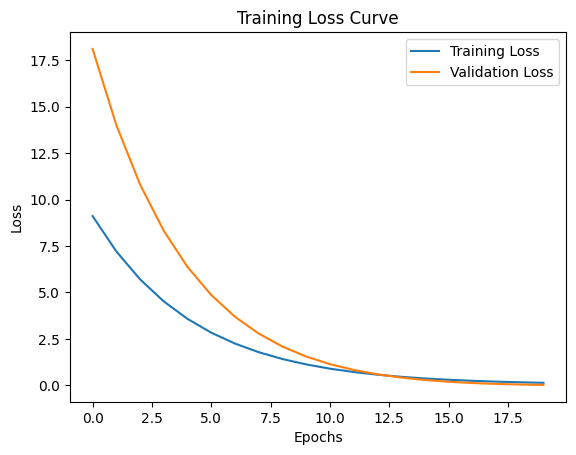

In [22]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curve')
plt.show()


This process took 3 minutes on CPU for 500 epochs

In [23]:
# Lets make a prediction on 1 data and compare with actual value
x_test =  np.array([2], dtype=np.float32).reshape(-1, 1)
y_predict = model.predict(x_test)

print(f'predicted value:{y_predict}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
predicted value:[[4.672372]]


In [7]:
# predict on range of values
# x_test = np.array([[1], [1.5], [2.5], [3.5], [5], [6]], dtype=np.float32) # this works too.
x_test =  np.array([1, 1.5, 2.5, 3.5, 5, 6], dtype=np.float32).reshape(-1, 1)
y_predict = model.predict(x_test)

# Compute actual y values based on equation y = 2*x + 1
y_actual = 1 + 2 * x_test 

# Print predictions and actual values
# print("Predictions vs Actual Values:")
# for i in range(len(x_test)):
#     print(f"x = {x_test[i][0]:.1f} | Predicted y = {y_predict[i][0]:.2f} | Actual y = {y_actual[i][0]:.2f}")
print("**************************")

# Or Create a DataFrame to store results
df_results = pd.DataFrame({
    'X': x_test.flatten(),
    'Predicted Y': y_predict.flatten(),
    'Actual Y': y_actual.flatten()
})

# Print DataFrame
print(df_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
**************************
     X  Predicted Y  Actual Y
0  1.0     2.666539       3.0
1  1.5     3.589488       4.0
2  2.5     5.435386       6.0
3  3.5     7.281282       8.0
4  5.0    10.050129      11.0
5  6.0    11.896026      13.0


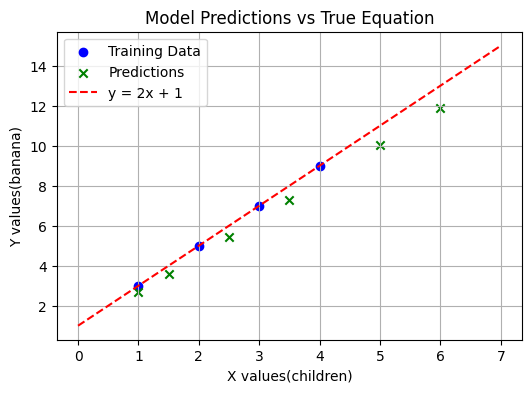

In [8]:
# Plotting
plt.figure(figsize=(6, 4))

# Scatter plot of true data
plt.scatter(X, y, color='blue', label='Training Data')

# Scatter plot of predictions
plt.scatter(x_test, y_predict, color='green', marker='x', label='Predictions')

# True equation line
x_line = np.linspace(0, 7, 100).reshape(-1, 1)  # Smoother line
y_line = 1 + 2 * x_line
plt.plot(x_line, y_line, color='red', linestyle='--', label='y = 2x + 1')

# Labels and legend
plt.xlabel('X values(children)')
plt.ylabel('Y values(banana)')
plt.title('Model Predictions vs True Equation')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Great
So we have created simple NN that has learned from data(x,y), and was able to make pretty accurate predictions on test dataset.

In [24]:
# # Evaluate the model on test data
x_test = np.array([1, 1.5, 2.5, 3.5, 5, 6], dtype=np.float32).reshape(-1, 1)
y_test = 2 * x_test + 1  # True values based on y = 2x + 1

# Evaluate the model (returns only loss, since accuracy is not relevant for regression)
test_loss = model.evaluate(x_test, y_test, verbose=0)

# Calculate baseline MSE (predicting the mean of y_test)
y_mean = np.mean(y_test)
baseline_mse = np.mean((y_test - y_mean) ** 2)

print(f"Model MSE: {test_loss:.4f}")
print(f"Baseline MSE: {baseline_mse:.4f}")

# Check if the model performs better than the baseline
if test_loss < baseline_mse:
    print("The model performs better than the baseline.")
else:
    print("The model is not better than a simple mean predictor.")


Model MSE: 0.0725
Baseline MSE: 12.9167
The model performs better than the baseline.


In [ ]:
Tensorflow does not provide its own R-square values, so lets use scikit-learn to calculate R-square.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict values
y_pred = model.predict(x_test)

# Compute errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Mean Absolute Error (MAE): 0.6802
Mean Squared Error (MSE): 0.5393
R² Score: 0.9582


R-square is looking good. So lets save the model

In [25]:
model.save("model.keras")

In [26]:
# Load the model back if you need in future

loaded_model = tf.keras.models.load_model("model.keras")


In [ ]:
x_test = np.array([1, 1.5], dtype=np.float32).reshape(-1, 1)
y_predict = loaded_model.predict(x_test)
print(y_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[2.5546505]
 [3.6377203]]


## TODO
Add another column 'age' in seperate CSV file, where relationship is banana =  1 + 2 * children + .5 * age ( y = 1 + 2 * x1 + .5 * x2).

Then use above model to make predictions. Do this in seperate notebook and follow exactly same steps as this one.